In [101]:
import numpy as np
from math import sqrt

def sorting_eig(s, u):
    i = 0
    while (i < len(s)):
        if (s[i] == 0):
            s = np.delete(s, i)
            u = np.delete(u, i, axis = 1)
            i -= 1
        i += 1
    order = np.argsort(s)
    s_res = s.copy()
    u_res = np.zeros(u.T.shape)
    for i in range(len(order)):
        s_res[i] = s[order[i]]
        u_res[i] = u.T[order[i]]
    return s_res, u_res.T

def svd(a):
    if a.shape[0] >= a.shape[1]:
        m = a @ a.T
        s, u = np.linalg.eig(m)
        s, u = sorting_eig(s, u)
        s = np.diagflat(s)
        s_inv = s.copy()
        for i in range(len(s)):
            s_inv[i][i] = s_inv[i][i] ** (-1)
        print(u.shape, s.shape)
        v = s_inv @ u.T @ a
        return u, s, v

    m = a.T @ a
    s, v = np.linalg.eig(m)
    s, v = sorting_eig(s, v)
    s = np.diagflat(s)
    s_inv = s.copy()
    for i in range(len(s)):
        s_inv[i][i] = s_inv[i][i] ** (-1)
    u = s_inv @ v.T @ a
    return u, s, v

In [102]:
u, s, v = svd(np.array([[1, 1, 0],
                        [1, 1, 0],
                        [0, 0, 1],
                        [1, 0, -1]]))
print(u @ s @ v, sep = '\n')

(4, 4) (4, 4)
[[  1.00000000e+00   1.00000000e+00   2.77555756e-16]
 [  1.00000000e+00   1.00000000e+00   0.00000000e+00]
 [  2.77555756e-17  -8.32667268e-17   1.00000000e+00]
 [  1.00000000e+00  -3.33066907e-16  -1.00000000e+00]]


In [119]:
import pandas as pd
from skimage import io
from matplotlib import pyplot as plt

data = pd.read_csv('train.csv')
print(data.head())
df = pd.DataFrame(data)
df_filtered = df.query('label == 2')
data = np.array(df_filtered, dtype=float)
y, x_data = np.hsplit(data, [1])

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0         

In [120]:
# try to use only first ten eighvalues
def try_svd(image, alpha):
    u, s, v = svd(image)
    io.imshow(u @ s @ v)
    plt.show()
    s = s[alpha:, alpha:]
    u = u[:, alpha:]
    v = v[alpha:, :]
    return u @ s @ v

/usr/local/lib/python3.5/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:77: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


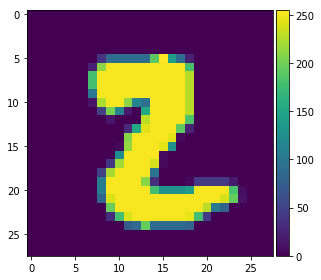

(28, 20) (20, 20)


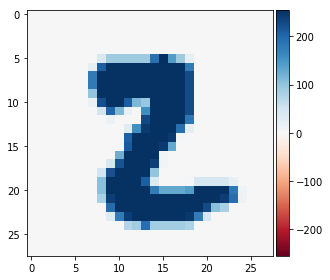

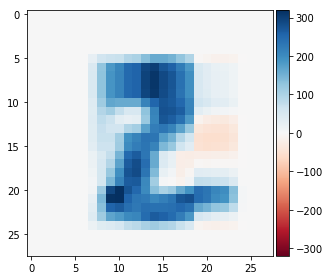

In [121]:
io.imshow(x_data[0].reshape(28, 28))
plt.show()
io.imshow(try_svd(x_data[0].reshape(28, 28), 17))
plt.show()